In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit_Score_Classification_Train.csv')

In [ ]:
dataset.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.6291625,Good
1,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.4513097,Good
2,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good
3,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.391238,High_spent_Large_value_payments,484.5912143,Good
4,0x1612,CUS_0x21b1,May,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,34.977895,26 Years and 11 Months,No,18.816215,130.115420,Low_spent_Small_value_payments,444.8670319,Good


<Axes: xlabel='Annual_Income', ylabel='Credit_Score'>

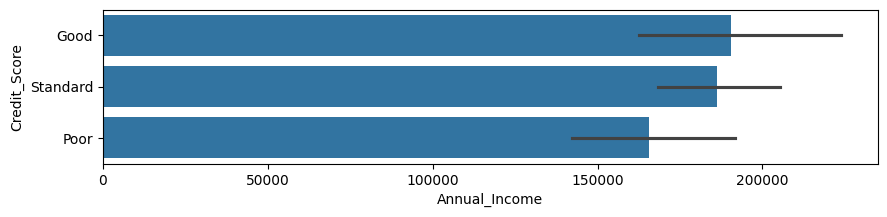

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,2))
sn.barplot(x='Annual_Income',y='Credit_Score',data=dataset)

From given barplot ,we can interpret that the Credit score is good for higher income customers as compared to others

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45482 entries, 0 to 45481
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        45482 non-null  object 
 1   Customer_ID               45482 non-null  object 
 2   Month                     45482 non-null  object 
 3   Name                      45482 non-null  object 
 4   Age                       45482 non-null  int64  
 5   SSN                       45482 non-null  object 
 6   Occupation                45482 non-null  object 
 7   Annual_Income             45482 non-null  float64
 8   Monthly_Inhand_Salary     38631 non-null  float64
 9   Num_Bank_Accounts         45482 non-null  int64  
 10  Num_Credit_Card           45482 non-null  int64  
 11  Interest_Rate             45482 non-null  int64  
 12  Num_of_Loan               45482 non-null  int64  
 13  Type_of_Loan              40435 non-null  object 
 14  Delay_

The data info convey there are still null values in the data.We can impute the data with mean to standardize the data before normalization

In [ ]:
dataset.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
X_feature=['Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']
X_Categorical=['Occupation','Payment_of_Min_Amount','Payment_Behaviour','Credit_Mix']

dataset_encoding=pd.get_dummies(dataset[X_feature],columns=X_Categorical)
dataset_encoding.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,...,False,False,False,False,True,False,False,False,True,False
1,23,19114.12,NaN,3,4,3,4,5,4.0,6.27,...,False,False,False,False,False,False,True,False,True,False
2,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,...,False,False,True,False,False,False,False,False,True,False
3,28,34847.84,3037.986667,2,4,6,1,7,1.0,7.42,...,False,True,False,False,False,False,False,False,True,False
4,28,34847.84,3037.986667,2,4,6,1,3,1.0,6.42,...,False,False,False,False,False,False,True,False,True,False


From the above code ,we have encoded the categorical values which will be helpful in classification model

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer

# Create an imputer object with the desired strategy (e.g., mean)
dataset_encoding['Monthly_Balance']=pd.to_numeric(dataset_encoding['Monthly_Balance'],errors='coerce')
imputer = SimpleImputer(strategy='most_frequent')  # You can use 'median' or 'most_frequent' as well

# Fit the imputer to your dataset and transform it
dataset_imputed = imputer.fit_transform(dataset_encoding)

# Convert the imputed data back to a pandas DataFrame
dataset_imputed = pd.DataFrame(dataset_imputed, columns=dataset_encoding.columns, index=dataset_encoding.index)

# Now apply the Normalizer
dataset_scale = Normalizer()
dataset_scale_array = dataset_scale.fit_transform(dataset_imputed)
print(dataset_scale_array)
dataframe_scale = pd.DataFrame(dataset_scale_array, columns=dataset_encoding.columns, index=dataset_encoding.index)
dataframe_scale.head()

[[1.19979740e-03 9.97090064e-01 6.12793914e-02 ... 0.00000000e+00
  5.21651043e-05 0.00000000e+00]
 [1.19980676e-03 9.97097844e-01 6.12798695e-02 ... 0.00000000e+00
  5.21655114e-05 0.00000000e+00]
 [1.19658943e-03 9.94424087e-01 9.49386195e-02 ... 0.00000000e+00
  5.20256275e-05 0.00000000e+00]
 ...
 [1.42061159e-03 9.79873213e-01 9.45395786e-02 ... 4.89866066e-05
  0.00000000e+00 0.00000000e+00]
 [6.22073699e-04 9.86086097e-01 8.35921694e-02 ... 0.00000000e+00
  2.48829480e-05 0.00000000e+00]
 [6.28512969e-04 9.96293367e-01 8.44574568e-02 ... 0.00000000e+00
  2.51405188e-05 0.00000000e+00]]


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,0.001200,0.997090,0.061279,0.000156,0.000209,0.000156,0.000209,-0.000052,0.000991,0.000588,...,0.0,0.000000,0.000000,0.0,0.000052,0.0,0.000000,0.0,0.000052,0.0
1,0.001200,0.997098,0.061280,0.000156,0.000209,0.000156,0.000209,0.000261,0.000209,0.000327,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000052,0.0,0.000052,0.0
2,0.001197,0.994424,0.094939,0.000156,0.000208,0.000156,0.000208,0.000312,0.000988,0.000586,...,0.0,0.000000,0.000052,0.0,0.000000,0.0,0.000000,0.0,0.000052,0.0
3,0.000800,0.995975,0.086828,0.000057,0.000114,0.000171,0.000029,0.000200,0.000029,0.000212,...,0.0,0.000029,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000029,0.0
4,0.000800,0.995984,0.086829,0.000057,0.000114,0.000171,0.000029,0.000086,0.000029,0.000183,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000029,0.0,0.000029,0.0


In [ ]:

dataframe_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45482 entries, 0 to 45481
Data columns (total 43 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 45482 non-null  float64
 1   Annual_Income                                       45482 non-null  float64
 2   Monthly_Inhand_Salary                               45482 non-null  float64
 3   Num_Bank_Accounts                                   45482 non-null  float64
 4   Num_Credit_Card                                     45482 non-null  float64
 5   Interest_Rate                                       45482 non-null  float64
 6   Num_of_Loan                                         45482 non-null  float64
 7   Delay_from_due_date                                 45482 non-null  float64
 8   Num_of_Delayed_Payment                              45482 non-null  float64


In [ ]:
dataframe_scale.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behavi

In [ ]:
X_feature=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
dataframe_scale[X_feature].corr()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
Age,1.000000,-0.037049,0.228684,0.088247,0.088784,0.082973,0.031944,0.633942,0.076933,0.629063,0.081359,0.605932,0.858329,-0.081367,0.225323,0.836220
Annual_Income,-0.037049,1.000000,0.196462,-0.008709,-0.012319,-0.050640,-0.008799,-0.094591,-0.017621,-0.092915,-0.010307,-0.146876,-0.052503,-0.926838,0.076807,-0.018830
Monthly_Inhand_Salary,0.228684,0.196462,1.000000,0.023807,0.031389,0.011044,0.010238,0.176855,0.026484,0.174456,0.030584,0.161029,0.249029,-0.228709,0.158145,0.271845
Num_Bank_Accounts,0.088247,-0.008709,0.023807,1.000000,0.006606,0.017838,-0.006539,0.080616,0.005539,0.086832,0.006042,0.082957,0.097558,-0.010189,0.029921,0.089011
Num_Credit_Card,0.088784,-0.012319,0.031389,0.006606,1.000000,0.019155,0.004470,0.085669,0.004890,0.077630,0.023734,0.083437,0.108233,-0.008343,0.031885,0.101890
Interest_Rate,0.082973,-0.050640,0.011044,0.017838,0.019155,1.000000,-0.001704,0.087549,0.014657,0.069327,0.004473,0.079123,0.093989,-0.010056,0.016609,0.090448
Num_of_Loan,0.031944,-0.008799,0.010238,-0.006539,0.004470,-0.001704,1.000000,0.042184,0.008128,0.045362,0.001292,0.048370,0.033034,-0.000476,0.004002,0.027877
Delay_from_due_date,0.633942,-0.094591,0.176855,0.080616,0.085669,0.087549,0.042184,1.000000,0.076119,0.647217,0.068580,0.779597,0.736580,-0.052600,0.175279,0.673099
Num_of_Delayed_Payment,0.076933,-0.017621,0.026484,0.005539,0.004890,0.014657,0.008128,0.076119,1.000000,0.074143,0.002984,0.071924,0.086457,-0.007851,0.031720,0.076754
Changed_Credit_Limit,0.629063,-0.092915,0.174456,0.086832,0.077630,0.069327,0.045362,0.647217,0.074143,1.000000,0.070943,0.751407,0.718901,-0.055393,0.168635,0.661128


<Axes: >

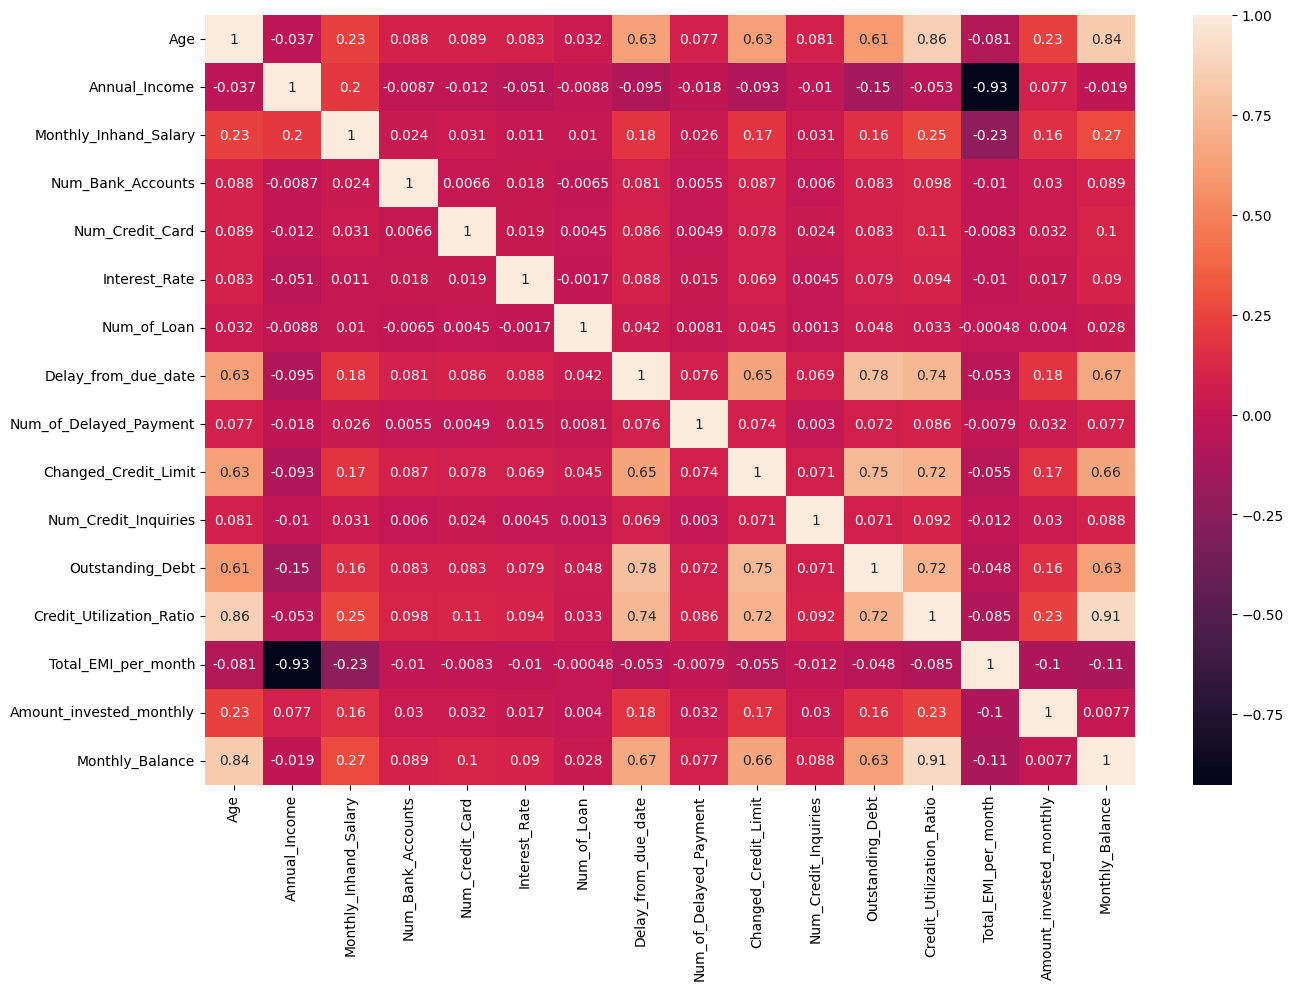

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15,10))
sn.heatmap(dataframe_scale[X_feature].corr(),annot=True)


From given heatmap,we can convey that 'Age',
       'Delay_from_due_date','Changed_Credit_Limit',
        'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Monthly Balance' are highly correlated.We can remove the given columns in our data model as columns should be independent of each other




In [ ]:
X_data=dataframe_scale[[ 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Num_of_Delayed_Payment',
       'Num_Credit_Inquiries',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Occupation_Accountant', 'Occupation_Architect', 'Occupation_Developer',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Credit_Mix_Bad',
       'Credit_Mix_Good', 'Credit_Mix_Standard']]
dataset['Credit_Score_binary'] = dataset['Credit_Score'].apply(lambda score: 1 if score in ['Good', 'Standard'] else 0)
Y_data=dataset['Credit_Score_binary']
X_data.info()
Y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45482 entries, 0 to 45481
Data columns (total 37 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Annual_Income                                       45482 non-null  float64
 1   Monthly_Inhand_Salary                               45482 non-null  float64
 2   Num_Bank_Accounts                                   45482 non-null  float64
 3   Num_Credit_Card                                     45482 non-null  float64
 4   Interest_Rate                                       45482 non-null  float64
 5   Num_of_Loan                                         45482 non-null  float64
 6   Num_of_Delayed_Payment                              45482 non-null  float64
 7   Num_Credit_Inquiries                                45482 non-null  float64
 8   Total_EMI_per_month                                 45482 non-null  float64


<Axes: xlabel='Credit_Score_binary', ylabel='Count'>

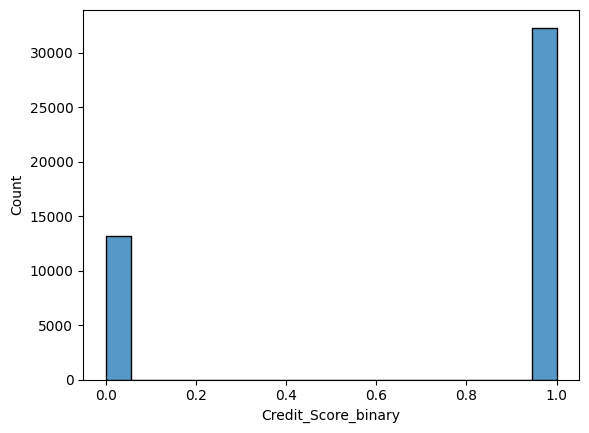

In [ ]:
sn.histplot(dataset['Credit_Score_binary'])

From given plot we can infer that candidates with Credit score good are more than bad credit score in the dataset

**SPLITTING THE DATASET**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=40)


**Building Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression()
logit.fit(X_train,Y_train)


LogisticRegression()

In [ ]:
from sklearn import metrics
Y_pred=logit.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.46      0.01      0.02      2653
           1       0.71      0.99      0.83      6444

    accuracy                           0.71      9097
   macro avg       0.58      0.50      0.43      9097
weighted avg       0.64      0.71      0.59      9097



From Classification Report we can infer that model can predict good credit score with 83% overall as compared to bad credit score which is only 2%

In [ ]:
metrics.roc_auc_score(Y_test,Y_pred)

0.5029715548704803

ROC SCORE 0.50 is not good while checking how accurately model is classifying good and bad credit score

**Building Random_Forest_Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randm_clf=RandomForestClassifier(max_depth=10,n_estimators=10)
randm_clf.fit(X_train,Y_train)


RandomForestClassifier(max_depth=10, n_estimators=10)

In [ ]:
Y_pred_1=randm_clf.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred_1))

              precision    recall  f1-score   support

           0       0.66      0.62      0.64      2653
           1       0.85      0.87      0.86      6444

    accuracy                           0.79      9097
   macro avg       0.75      0.74      0.75      9097
weighted avg       0.79      0.79      0.79      9097



From Classification Report we can infer that model can predict good credit score with 86% overall,Precison is 85% and 87% Recall which means Type 1 error(Manufacturer error)  and Type 2 error(Consumer error) is minimized as they are inversely propotional to Precison and Recall. Bad credit score prediction comes with 64% accuracy which is improved as compared to Logistic Regression model run previously

In [ ]:
metrics.roc_auc_score(Y_test,Y_pred_1)

0.7414905779924722

ROC SCORE 0.74 is improved than previous 0.50  while checking how accurately model is classifying good and bad credit score

In [ ]:
params = {
    'max_depth': [2,3,5,8,10,12,15],
    'n_estimators': [2,5,8,10,13,15,20,25,30,35]
    }

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(randm_clf,
                           param_grid=params
                           )
grid_search.fit(X_train,Y_train)
grid_search.best_estimator_


RandomForestClassifier(max_depth=15, n_estimators=30)

From Grid Search ,we can estimate the parameters with max_depth=15 and estimator ie:No of features =30 are the best parameters from the given params

**RANDOM FOREST CLASSIFIER WITH NEW PARAMETERS AS PER GRID SEARCH CV**

In [ ]:
randm_clf_1=RandomForestClassifier(max_depth=15,n_estimators=30)
randm_clf_1.fit(X_train,Y_train)

RandomForestClassifier(max_depth=15, n_estimators=30)

In [ ]:
Y_pred_2=randm_clf_1.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred_2))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      2653
           1       0.86      0.89      0.87      6444

    accuracy                           0.82      9097
   macro avg       0.78      0.77      0.78      9097
weighted avg       0.82      0.82      0.82      9097



From Classification Report we can infer that Random_Forest_model with new parameters can predict good credit score with 87% overall,Precison is 86% and 89% Recall which means Type 1 error(Manufacturer error) and Type 2 error(Consumer error) is minimized as they are inversely propotional to Precison and Recall. Bad credit score prediction comes with 68% accuracy which is improved as compared to Random Foest model with old parameters run previously

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(Y_test,Y_pred_2)

0.7689271634912914

ROC SCORE 0.7689 is improved  while checking how accurately model is classifying good and bad credit score

**GRADIENT BOOST**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_clf=GradientBoostingClassifier()


In [ ]:
Y_pred_3=randm_clf_1.predict(X_test)
print(metrics.classification_report(Y_test,Y_pred_3))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      2653
           1       0.86      0.89      0.87      6444

    accuracy                           0.82      9097
   macro avg       0.78      0.77      0.78      9097
weighted avg       0.82      0.82      0.82      9097



<Axes: ylabel='Count'>

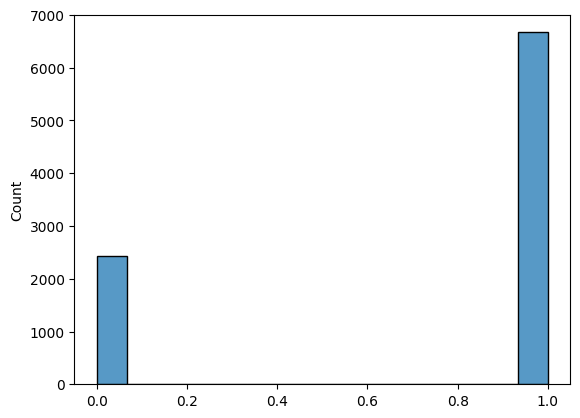

In [ ]:
sn.histplot(Y_pred_3)

In [ ]:
metrics.roc_auc_score(Y_test,Y_pred_3)

0.7689271634912914

Gradient Booster one of the ensemble model is predicting similar results while using Random Forest Classifier with hyperparameters used as shown in previous example